<a href="https://colab.research.google.com/github/Amishachoudhary22/AI-ML/blob/main/breast_cancerdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('breast-cancer.csv')
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [6]:
#M- malignant (Dangerous) (1)
#B- benign (Not Dangerous) (0)

In [5]:
del dataset['id']

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
data=dataset[[col for col in dataset.columns if col!='diagnosis']+['diagnosis']]
data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [9]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
data['diagnosis']=l1.fit_transform(data['diagnosis'])
data['diagnosis'].unique()

array([1, 0])

In [10]:
data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [11]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [12]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

{'whiskers': [<matplotlib.lines.Line2D at 0x7f60dcbb64c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f60dcbb6b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f60dcbb6130>,
 'medians': [<matplotlib.lines.Line2D at 0x7f60dcbc4280>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f60dcbc4580>,
 'means': []}

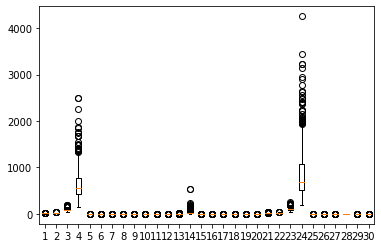

In [13]:
plt.boxplot(x)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


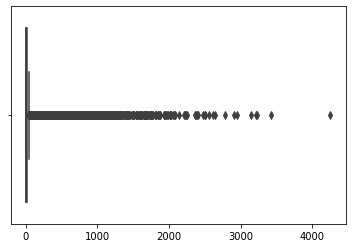

In [14]:
sns.boxplot(x)

In [15]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
x_data,y_data=s.fit_resample(x,y)

In [16]:
from collections import Counter
print(Counter(y_data))

Counter({1: 357, 0: 357})


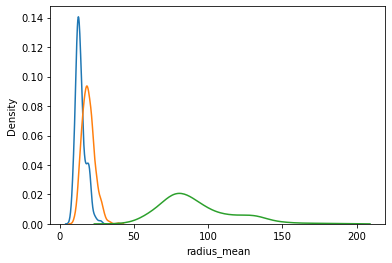

In [17]:
sns.kdeplot(data['radius_mean'])
sns.kdeplot(data['texture_mean'])
sns.kdeplot(data['perimeter_mean'])

In [18]:
from sklearn.preprocessing import StandardScaler
ssd=StandardScaler()
x_scaled=ssd.fit_transform(x_data)
x_scaled

array([[ 0.85949452, -2.21563472,  1.02297184, ...,  2.02792297,
         2.5821384 ,  1.75035258],
       [ 1.56103617, -0.48616326,  1.42127195, ...,  0.84736116,
        -0.35941042,  0.16963571],
       [ 1.32175065,  0.32825632,  1.30690855, ...,  1.69486775,
         1.01204103,  0.09345659],
       ...,
       [ 0.86647424, -0.66419307,  0.8138014 , ...,  0.36291609,
        -0.23786886, -0.19906118],
       [-0.4206265 ,  0.49682644, -0.3864964 , ...,  0.65023879,
         1.10828734,  1.04577086],
       [ 0.14243138,  1.07864261,  0.22370163, ...,  1.05612646,
         1.6287846 ,  0.72012956]])

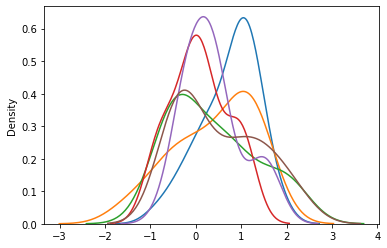

In [19]:
sns.kdeplot(x_scaled[2])
#sns.kdeplot(x_scaled[3])
sns.kdeplot(x_scaled[4])
sns.kdeplot(x_scaled[5])
sns.kdeplot(x_scaled[6])
sns.kdeplot(x_scaled[7])
sns.kdeplot(x_scaled[8])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f60d6c52b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f60d6be6250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f60d6c527f0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f60d6be6910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f60d6be6c40>,
 'means': []}

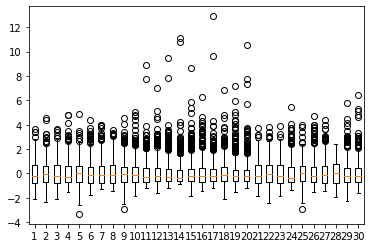

In [20]:
plt.boxplot(x_scaled)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


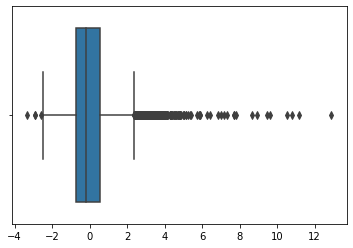

In [21]:
sns.boxplot(x_scaled)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_data,test_size=0.2,random_state=15)

In [23]:
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression()
l1.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred=l1.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1])

In [25]:
from sklearn.metrics import accuracy_score
A1=accuracy_score(y_test,y_pred)*100
A1

97.9020979020979

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(p=1)

In [27]:
knn_pred=knn.predict(x_test)
knn_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1])

In [28]:
A2=accuracy_score(y_test,knn_pred)*100
A2

96.5034965034965

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
rfc_pred=rfc.predict(x_test)
rfc_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0])

In [31]:
A3=accuracy_score(y_test,rfc_pred)*100
A3

93.00699300699301

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion = "entropy",random_state=20)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=20)

In [33]:
dt_pred=dt.predict(x_test)
dt_pred

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0])

In [34]:
A4=accuracy_score(y_test,dt_pred)*100
A4

93.00699300699301

In [36]:
Avg_accuracy=(A1+A2+A3+A4)/4
Avg_accuracy

95.1048951048951

In [37]:
print(Counter(y_train))

Counter({1: 286, 0: 285})


In [38]:
print(Counter(y_test))

Counter({0: 72, 1: 71})


In [39]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=20)
skf.split(x_scaled,y_data)
print(skf)

StratifiedKFold(n_splits=5, random_state=20, shuffle=True)


In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
y_pred1=cross_val_predict(l1,x_test,y_test,cv=skf)
score1=cross_val_score(l1,x_train,y_train,cv=skf)
print(y_pred1)
print(score1)
AA1=print(score1.mean()*100)
AA1

[0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1
 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1]
[0.97391304 0.98245614 0.98245614 0.97368421 0.98245614]
97.89931350114416


In [41]:
y_pred2=cross_val_predict(knn,x_test,y_test,cv=skf)
score2=cross_val_score(knn,x_train,y_train,cv=skf)
print(y_pred2)
print(score2)
AA2=print(score2.mean()*100)
AA2

[0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1
 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0
 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1]
[0.93913043 0.98245614 0.98245614 0.97368421 0.97368421]
97.0282227307399


In [42]:
y_pred3=cross_val_predict(rfc,x_test,y_test,cv=skf)
score3=cross_val_score(rfc,x_train,y_train,cv=skf)
print(y_pred3)
print(score3)
AA3=print(score3.mean()*100)
AA3

[0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1
 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0
 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1]
[0.93043478 0.97368421 0.98245614 0.97368421 0.97368421]
96.67887109077041


In [43]:
y_pred4=cross_val_predict(dt,x_test,y_test,cv=skf)
score4=cross_val_score(dt,x_train,y_train,cv=skf)
print(y_pred4)
print(score4)
AA4=print(score4.mean()*100)
AA4

[0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0
 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1
 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0
 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1]
[0.89565217 0.94736842 0.95614035 0.95614035 0.95614035]
94.22883295194508


In [44]:
CV_Final_Accuracy=(97.37604881769641+97.55301296720059+97.37604881769641+94.40122044241036)/4
CV_Final_Accuracy

96.67658276125094

In [46]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[("Logistic Regression",l1),("KNN",knn),("Random Forest",rfc),("Decision Tree",dt)])
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('KNN', KNeighborsClassifier(p=1)),
                             ('Random Forest', RandomForestClassifier()),
                             ('Decision Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=20))])

In [47]:
vc_pred=vc.predict(x_test)
vc_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0])

In [48]:
Voting_accuracy=accuracy_score(y_test,vc_pred)
Voting_accuracy*100

95.1048951048951

In [49]:
ann=tf.keras.models.Sequential()
ann

In [50]:
ann.add(tf.keras.layers.Dense(units=8,activation='relu')) #1st hidden layer i.e input layer
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
#Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [51]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
ann.fit(x_train,y_train,batch_size=30,epochs=50)

Epoch 1/50
20/20 [==============================] - 4s 4ms/step - loss: 0.6925 - accuracy: 0.5289
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.6830
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6381 - accuracy: 0.5009
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5282 - accuracy: 0.6252
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4289 - accuracy: 0.8984
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.9317
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.3656 - accuracy: 0.9510
Epoch 8/50
20/20 [==============================] - 0s 3ms/step - loss: 0.3426 - accuracy: 0.9632
Epoch 9/50
20/20 [==============================] - 0s 3ms/step - loss: 0.3246 - accuracy: 0.9580
Epoch 10/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3017 - accuracy: 0.9702
Epoch 11/50
20/20 [

In [53]:
ann_pred=ann.predict(x_test)
ann_pred

5/5 [==============================] - 0s 4ms/step


array([[1.3442387e-04],
       [9.9903268e-01],
       [9.9993849e-01],
       [6.0510269e-05],
       [7.5477967e-04],
       [9.0669499e-05],
       [8.2840270e-04],
       [1.0000000e+00],
       [3.6611345e-02],
       [1.0000000e+00],
       [1.1841300e-03],
       [1.6966584e-04],
       [5.9536792e-04],
       [2.0512718e-05],
       [5.7800888e-05],
       [1.0000000e+00],
       [3.8081412e-03],
       [2.5372470e-05],
       [9.9970227e-01],
       [8.5945241e-04],
       [1.0000000e+00],
       [1.0000000e+00],
       [6.9454341e-04],
       [1.0000000e+00],
       [1.0638330e-05],
       [1.1511807e-03],
       [4.0844729e-04],
       [2.1068970e-04],
       [1.6566194e-04],
       [9.9999994e-01],
       [1.2418580e-04],
       [1.0000000e+00],
       [4.1324217e-03],
       [1.9788889e-03],
       [9.9999934e-01],
       [4.0486496e-04],
       [2.2203603e-03],
       [1.9084321e-03],
       [3.5084222e-04],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.525587

In [54]:
New_ann_pred=[]
for x in ann_pred:
    if x>=0.5:
        New_ann_pred.append(1)
    else:
        New_ann_pred.append(0)
print(New_ann_pred)

[0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1]


In [55]:
ANN_score=accuracy_score(y_test,New_ann_pred)
ANN_score*100

97.2027972027972

In [56]:
pd.DataFrame(np.c_[y_test,New_ann_pred],columns=["Actual_Values","Predicted_Values"])

,Actual_Values,Predicted_Values
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
138,0,0
139,0,0
140,1,1
141,0,0


In [57]:
pd.DataFrame(np.c_[y_test,New_ann_pred],columns=["Actual_Values","Predicted_Values"])

,Actual_Values,Predicted_Values
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
138,0,0
139,0,0
140,1,1
141,0,0
